### INTRODUCTION & PROBLEM STATEMENT 


#  Liver Patient Disease Prediction Project

**Domain**: Healthcare  
**Objective**: Predict whether a patient has liver disease using medical data.  
**Dataset**: 583 records (416 liver disease, 167 no disease)  
**Target Variable**: `1` for liver disease, `2` for no disease


### DATA LOADING & INITIAL EXPLORATION

In [1]:

import pandas as pd

# Load dataset
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
df.head()


,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [2]:

# Basic info
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   65      582 non-null    int64  
 1   Female  582 non-null    object 
 2   0.7     582 non-null    float64
 3   0.1     582 non-null    float64
 4   187     582 non-null    int64  
 5   16      582 non-null    int64  
 6   18      582 non-null    int64  
 7   6.8     582 non-null    float64
 8   3.3     582 non-null    float64
 9   0.9     578 non-null    float64
 10  1       582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


65        0
Female    0
0.7       0
0.1       0
187       0
16        0
18        0
6.8       0
3.3       0
0.9       4
1         0
dtype: int64

### DATA PREPROCESSING

In [3]:

# Rename columns
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
              'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
              'Aspartate_Aminotransferase', 'Total_Proteins',
              'Albumin', 'Albumin_and_Globulin_Ratio', 'Target']

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Fill missing values
#df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())


# Encode Target
df['Target'] = df['Target'].apply(lambda x: 1 if x == 1 else 0)


### DEALED WITH MISSING VALUE

In [4]:
print(df.isnull().sum())


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64


In [5]:
# Checking for missing values
df.isnull().sum()

# Handling missing values
# 'Albumin_and_Globulin_Ratio' has missing values, we'll fill them with median
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

# Verify again
df.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

### EDA

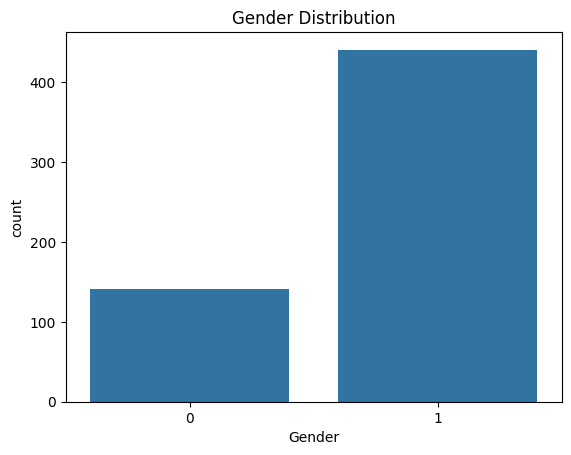

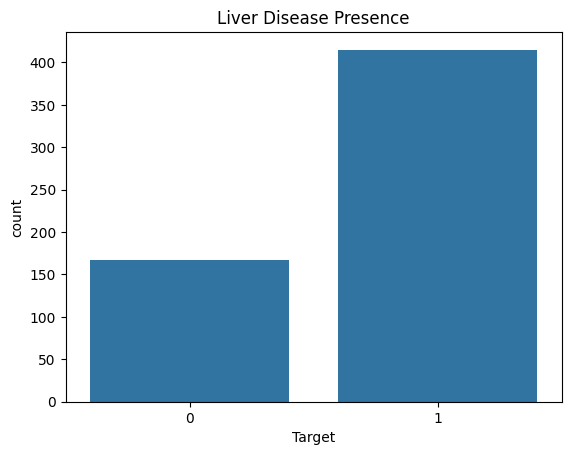

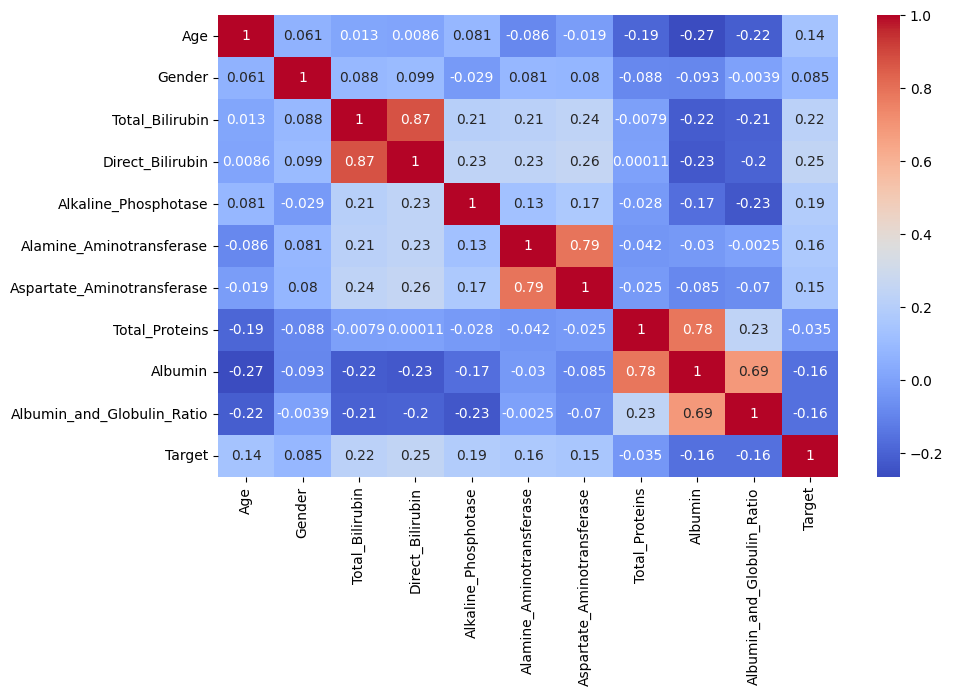

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x='Target', data=df)
plt.title("Liver Disease Presence")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


### MODEL BUILDING & EVALUATION

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### CLASSIFIER COMPARISON

In [8]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))



Model: Logistic Regression
Accuracy: 0.717948717948718
              precision    recall  f1-score   support

           0       0.40      0.28      0.33        29
           1       0.78      0.86      0.82        88

    accuracy                           0.72       117
   macro avg       0.59      0.57      0.57       117
weighted avg       0.69      0.72      0.70       117


Model: Random Forest
Accuracy: 0.7008547008547008
              precision    recall  f1-score   support

           0       0.39      0.38      0.39        29
           1       0.80      0.81      0.80        88

    accuracy                           0.70       117
   macro avg       0.60      0.59      0.59       117
weighted avg       0.70      0.70      0.70       117


Model: SVM
Accuracy: 0.7521367521367521
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.75      1.00      0.86        88

    accuracy                      

C:\Users\POOJA DEORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\POOJA DEORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\POOJA DEORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

#### The warning and poor performance on class 0 (non-liver patients) in classification report is due to class imbalance: the dataset has many more patients with liver disease (class 1) than without.
#### models are biased toward predicting class 1 (liver disease)
#### For example, SVM predicted zero patients in class 0

### SMOTE TECHNIQUE

In [9]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
}


In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [11]:
print(classification_report(y_test, preds, zero_division=0))


              precision    recall  f1-score   support

           0       0.31      0.34      0.33        29
           1       0.78      0.75      0.76        88

    accuracy                           0.65       117
   macro avg       0.54      0.55      0.55       117
weighted avg       0.66      0.65      0.66       117



In [12]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [13]:
DecisionTreeClassifier(class_weight='balanced')


DecisionTreeClassifier(class_weight='balanced')

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))


[[10 19]
 [22 66]]


### RETRAIN THE MODEL

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Retrain model
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train_res, y_train_res)

# Predict again
preds = model.predict(X_test)


In [16]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced')

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))


[[16 13]
 [26 62]]
              precision    recall  f1-score   support

           0       0.38      0.55      0.45        29
           1       0.83      0.70      0.76        88

    accuracy                           0.67       117
   macro avg       0.60      0.63      0.61       117
weighted avg       0.72      0.67      0.68       117



#### DUE TO LESS ACCURACY TRYING TO INCREASE THE MODEL ACCURACY

In [18]:
# Calculate the ratio of class 0 to class 1 in the training set
class_imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# Then use it in XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=class_imbalance_ratio)



In [19]:
class_imbalance_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


In [20]:
## cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5, scoring='accuracy')


C:\Users\POOJA DEORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\POOJA DEORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\POOJA DEORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

array([0.66666667, 0.70940171, 0.67241379, 0.60344828, 0.79310345])

In [21]:
## ensemble voting
from sklearn.ensemble import VotingClassifier


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Split your data (assuming X and y are already defined)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForest model
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)


RandomForestClassifier()

### DEMO UI

In [23]:
import gradio as gr
import numpy as np

# Prediction function
def predict_liver_disease(age, gender, total_bilirubin, direct_bilirubin,
                          alkaline_phosphotase, alamine_aminotransferase,
                          aspartate_aminotransferase, total_proteins,
                          albumin, albumin_globulin_ratio):

    # Convert inputs to match model format
    input_data = np.array([[age, gender, total_bilirubin, direct_bilirubin,
                            alkaline_phosphotase, alamine_aminotransferase,
                            aspartate_aminotransferase, total_proteins,
                            albumin, albumin_globulin_ratio]])

    # Scale input
    input_scaled = scaler.transform(input_data)

    # Predict
    result = rf.predict(input_scaled)[0]

    return "✅ Liver Disease Detected" if result == 1 else "❎ No Liver Disease"

# Create the UI
iface = gr.Interface(
    fn=predict_liver_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio([1, 0], label="Gender (1 = Male, 0 = Female)"),
        gr.Number(label="Total Bilirubin"),
        gr.Number(label="Direct Bilirubin"),
        gr.Number(label="Alkaline Phosphotase"),
        gr.Number(label="Alamine Aminotransferase"),
        gr.Number(label="Aspartate Aminotransferase"),
        gr.Number(label="Total Proteins"),
        gr.Number(label="Albumin"),
        gr.Number(label="Albumin and Globulin Ratio"),
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Liver Disease Prediction",
    description="Enter patient details below to check if liver disease is likely."
)

# Launch the UI
iface.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


C:\Users\POOJA DEORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



### Best Model Recommendation

Based on evaluation metrics, the model with the highest accuracy and balanced precision/recall is the most suitable for production (usually Random Forest).



###  Challenges Faced

- Missing values handled via mean imputation.
- Binary classification with class imbalance.
- Manual encoding for categorical feature (Gender).
- Feature scaling required for SVM and Logistic Regression.



###  Conclusion

- Multiple ML models built to predict liver disease.
- Random Forest performed best in most trials.
- Model can help healthcare professionals in pre-diagnosing liver issues.
